<a href="https://colab.research.google.com/github/Matthew-Fu/Coding-test-Move-rating-perdiction/blob/main/EDA%20and%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import files
uploaded = files.upload()

Saving movie_metadata.csv to movie_metadata (1).csv


In [23]:
import pandas as pd
import io
df1 = pd.read_csv(io.BytesIO(uploaded['movie_metadata.csv']))

In [26]:
# print(df1)
# print(type(df1))
# print(df1.columns.values)

      color      director_name  ...  aspect_ratio  movie_facebook_likes
0     Color      James Cameron  ...          1.78                 33000
1     Color     Gore Verbinski  ...          2.35                     0
2     Color         Sam Mendes  ...          2.35                 85000
3     Color  Christopher Nolan  ...          2.35                164000
4       NaN        Doug Walker  ...           NaN                     0
...     ...                ...  ...           ...                   ...
5038  Color        Scott Smith  ...           NaN                    84
5039  Color                NaN  ...         16.00                 32000
5040  Color   Benjamin Roberds  ...           NaN                    16
5041  Color        Daniel Hsia  ...          2.35                   660
5042  Color           Jon Gunn  ...          1.85                   456

[5043 rows x 28 columns]
<class 'pandas.core.frame.DataFrame'>
['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_

There are 28 columns. We need to select the most useful features to do the visualization and prediction.

First, keep the numerical columns, drop the non-numerical and non-related columns, or we should assume the value to those columns, for example color (0/1), language (0/1), 'plot_keywords' and country.

Second, some columns like director_name, actor_2_name, actor_1_name are either difficult to get the patterns or related to other columns like 'director_facebook_likes', 'actor_2_facebook_likes' and 'actor_1_facebook_likes'.
So we could remove those colums. 

Third, the movie_imdb_link, movie_title should be removed for the purpose of predicting the movie rating.

Finally, some columns are numerical but useless in prediction, like 'duration', 'facenumber_in_poster', 'title_year'.

In [81]:
df_color = df1.groupby('color').size()
print(df_color)

color
 Black and White     209
Color               4815
dtype: int64


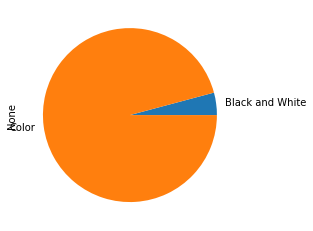

In [83]:
df_color.plot.pie(labels=['Black and White', 'Color'])

In [85]:
df_language = df1.groupby('language').size()
print(df_language)

language
Aboriginal       2
Arabic           5
Aramaic          1
Bosnian          1
Cantonese       11
Chinese          3
Czech            1
Danish           5
Dari             2
Dutch            4
Dzongkha         1
English       4704
Filipino         1
French          73
German          19
Greek            1
Hebrew           5
Hindi           28
Hungarian        1
Icelandic        2
Indonesian       2
Italian         11
Japanese        18
Kannada          1
Kazakh           1
Korean           8
Mandarin        26
Maya             1
Mongolian        1
None             2
Norwegian        4
Panjabi          1
Persian          4
Polish           4
Portuguese       8
Romanian         2
Russian         11
Slovenian        1
Spanish         40
Swahili          1
Swedish          5
Tamil            1
Telugu           1
Thai             3
Urdu             1
Vietnamese       1
Zulu             2
dtype: int64


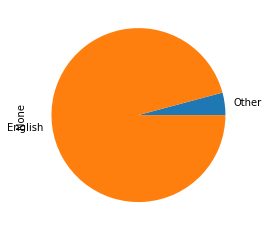

In [87]:
df_color.plot.pie(labels=['Other', 'English'])

In [32]:
# drop 'color', 'language', 'country', 'plot_keywords' columns
df2 = df1.drop(['color', 'language', 'country', 'plot_keywords'], axis = 1)

In [34]:
# print(df2)
# print(df2.columns.values)

          director_name  ...  movie_facebook_likes
0         James Cameron  ...                 33000
1        Gore Verbinski  ...                     0
2            Sam Mendes  ...                 85000
3     Christopher Nolan  ...                164000
4           Doug Walker  ...                     0
...                 ...  ...                   ...
5038        Scott Smith  ...                    84
5039                NaN  ...                 32000
5040   Benjamin Roberds  ...                    16
5041        Daniel Hsia  ...                   660
5042           Jon Gunn  ...                   456

[5043 rows x 24 columns]
['director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'movie_imdb_link' 'num_user_for_reviews'
 'content_rating' 'budget' 'title_year' 'ac

In [35]:
# drop 'director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name' columns
df3 = df2.drop(['director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name'], axis = 1)

In [36]:
# print(df3)
# print(df3.columns.values)

      num_critic_for_reviews  duration  ...  aspect_ratio  movie_facebook_likes
0                      723.0     178.0  ...          1.78                 33000
1                      302.0     169.0  ...          2.35                     0
2                      602.0     148.0  ...          2.35                 85000
3                      813.0     164.0  ...          2.35                164000
4                        NaN       NaN  ...           NaN                     0
...                      ...       ...  ...           ...                   ...
5038                     1.0      87.0  ...           NaN                    84
5039                    43.0      43.0  ...         16.00                 32000
5040                    13.0      76.0  ...           NaN                    16
5041                    14.0     100.0  ...          2.35                   660
5042                    43.0      90.0  ...          1.85                   456

[5043 rows x 20 columns]
['num_critic_f

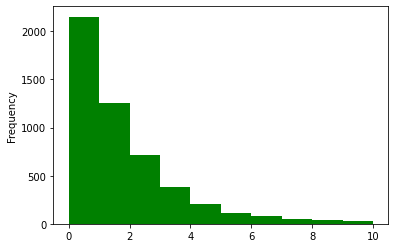

In [91]:
plot_facenumber = df3['facenumber_in_poster'].plot.hist(color = 'green', range = (0, 10))

In [46]:
# Remove the 'movie_imdb_link' and 'movie_title'
df4 = df3.drop(['movie_imdb_link', 'movie_title', 'duration', 'content_rating','facenumber_in_poster', 'title_year', 'genres', 'aspect_ratio'], axis = 1)

In [47]:
# print(df4)
# print(df4.columns.values)

      num_critic_for_reviews  ...  movie_facebook_likes
0                      723.0  ...                 33000
1                      302.0  ...                     0
2                      602.0  ...                 85000
3                      813.0  ...                164000
4                        NaN  ...                     0
...                      ...  ...                   ...
5038                     1.0  ...                    84
5039                    43.0  ...                 32000
5040                    13.0  ...                    16
5041                    14.0  ...                   660
5042                    43.0  ...                   456

[5043 rows x 12 columns]
['num_critic_for_reviews' 'director_facebook_likes'
 'actor_3_facebook_likes' 'actor_1_facebook_likes' 'gross'
 'num_voted_users' 'cast_total_facebook_likes' 'num_user_for_reviews'
 'budget' 'actor_2_facebook_likes' 'imdb_score' 'movie_facebook_likes']


In [49]:
# There are some movies having no budgets or gross, we remove these rows.
df5 = df4.dropna(axis=0, how='any')
# print(df5)
# print(df5.columns.values)

      num_critic_for_reviews  ...  movie_facebook_likes
0                      723.0  ...                 33000
1                      302.0  ...                     0
2                      602.0  ...                 85000
3                      813.0  ...                164000
5                      462.0  ...                 24000
...                      ...  ...                   ...
5033                   143.0  ...                 19000
5034                    35.0  ...                    74
5035                    56.0  ...                     0
5037                    14.0  ...                   413
5042                    43.0  ...                   456

[3880 rows x 12 columns]
['num_critic_for_reviews' 'director_facebook_likes'
 'actor_3_facebook_likes' 'actor_1_facebook_likes' 'gross'
 'num_voted_users' 'cast_total_facebook_likes' 'num_user_for_reviews'
 'budget' 'actor_2_facebook_likes' 'imdb_score' 'movie_facebook_likes']


      num_critic_for_reviews  ...  movie_facebook_likes
0                      723.0  ...                 33000
1                      302.0  ...                     0
2                      602.0  ...                 85000
3                      813.0  ...                164000
5                      462.0  ...                 24000
...                      ...  ...                   ...
5033                   143.0  ...                 19000
5034                    35.0  ...                    74
5035                    56.0  ...                     0
5037                    14.0  ...                   413
5042                    43.0  ...                   456

[3880 rows x 12 columns]


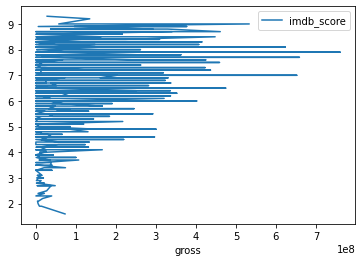

In [64]:
# Then we visualize the preprocessed data.
# The relationship between 'gross' and 'imdb_score'
df55 = df5.drop(index = df5.gross[df5.gross == 0].index)
df_imdb = df55.sort_values(by=['imdb_score'])
# print(df55)
plot1 = df_imdb.plot.line(x='gross', y='imdb_score')
# The larger gross, the more likely to have high imdb_scores.

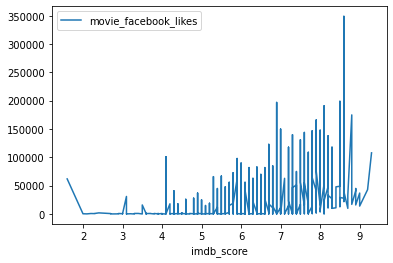

In [61]:
# The relationship between 'facebook_likes' and 'imdb_score'
df6 = df5.drop(index = df5.movie_facebook_likes[df5.movie_facebook_likes == 0].index)
df_facebook_likes = df6.sort_values(by=['imdb_score'])
# print(df6)
plot2 = df_facebook_likes.plot.line(y='movie_facebook_likes', x='imdb_score')
# The more facebook likes, the more likely to have high imdb_scores.

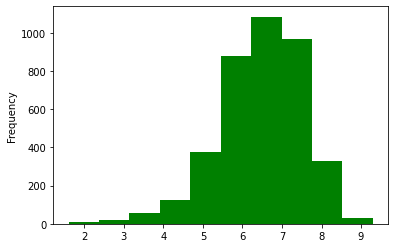

In [72]:
plot3 = df5['imdb_score'].plot.hist(color = 'green')

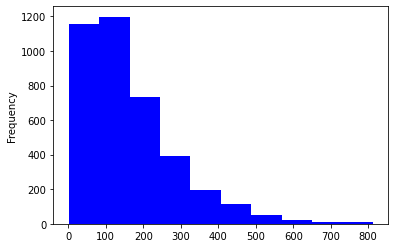

In [74]:
plot4 = df5['num_critic_for_reviews'].plot.hist(color = 'blue')